# Projeto 3
## André Ejzenmesser
## Vinicius Bonelli

### Introdução: 
O objetivo do Projeto 3 de Ciência dos Dados era aprender a utilizar uma técnica estatística muito utilizada quando queremos estudar os efeitos que certas varáveis, chamadas de variáveis explicativas tem em uma outra variável denominada variável reposta. Essa técnica, chamada de regressão, consiste na construção de relações matemáticas entre as variáveis, e assim podemos analisar e tirar conclusões dessas relações. Existem basicamente dois tipos de regressões lineares: a simples, onde analisamos como uma variável explicativa afeta uma variável resposta, e a múltipla, onde podemos construir modelos com várias variáveis explicativas afetando uma variável resposta. O foco do Projeto 3 se dará no estudo das regressões lineares múltiplas.

### Escolha das variáveis:
Como variável resposta tínhamos que utilizar obrigatoriamente alguma das variáveis fornecidas pelos professores. Acabamos escolhendo o Índice de Percepção de Corrupção (Corruption Perception Index - CPI) como nossa variável resposta. Para escolhermos as variáveis explicativas utilizamos, através do site www.gapminder.org, a base de dados do Banco Mundial e focamos nossas buscas no ano de 2009, que era o ano onde tínhamos mais dados disponíveis. Dentre várias opções iniciais (mostraremos algumas escolhas ao longo deste relatório), optamos finalmente por utilizar as variáveis IDH e Acesso à Internet a cada 100 pessoas como nossas variáveis explicativas.




In [1]:
%matplotlib notebook

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
import scipy

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/AndreEjz/Desktop/CDP3


## Organizando Banco de Dados:

- Carregando todos os bancos de dados que vamos utilizar ao longo do projeto:

In [2]:
d0 = pd.read_excel('Dados.xlsx', index_col=0)
d1 = pd.read_excel('CDados.xlsx', index_col=0)
d2 = pd.read_excel('Corrupcao.xlsx', index_col=0)
grupos = pd.read_excel('grupos.xlsx', index_col=0)

- Notamos que a tabela de CPI não estava em ordem e faltam alguns paises:

In [3]:
d2.head()

,CPI
Paises,
Afghanistan,1.4
Albania,3.3
Algeria,2.9
Angola,1.9
Argentina,2.9


In [4]:
d0.head()

,Internet,Celular,Renda,IDH,Saneamento,Servicos
Países,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,47.607657
Afghanistan,3.246306,34.338687,NaN,0.387,37.0,60.239255
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,30.960967
Albania,41.200000,77.167390,1857.352947,0.734,94.0,NaN
Algeria,11.230000,93.647115,2192.703976,0.691,95.0,NaN


- Utilizamos o método join para juntar a tabela de CPI com os outros bancos de dados para evitar erros:

In [5]:
dados0 = d2.join(d0, how='outer')
dados0.head()

,CPI,Internet,Celular,Renda,IDH,Saneamento,Servicos
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,47.607657
Afghanistan,1.4,3.246306,34.338687,NaN,0.387,37.0,60.239255
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,30.960967
Albania,3.3,41.200000,77.167390,1857.352947,0.734,94.0,NaN
Algeria,2.9,11.230000,93.647115,2192.703976,0.691,95.0,NaN


- Filtramos todos os erros (NaN) para obtermos um banco de dados limpo onde poderiamos começar a trabalhar:

In [6]:
dados0=dados0[~np.isnan(dados0.CPI)]
dados0=dados0[~np.isnan(dados0.Internet)]
dados0=dados0[~np.isnan(dados0.IDH)]
dados0=dados0[~np.isnan(dados0.Celular)]
dados0=dados0[~np.isnan(dados0.Renda)]
dados0=dados0[~np.isnan(dados0.Saneamento)]
dados0=dados0[~np.isnan(dados0.Servicos)]

dados0.shape

(83, 7)

____
## Análise Descritiva

- Geramos os gráficos de cada variável explicativa comparada a variável resposta para nos ajudar a definir quais seriam as duas que iríamos escolher:

<IPython.core.display.Javascript object>


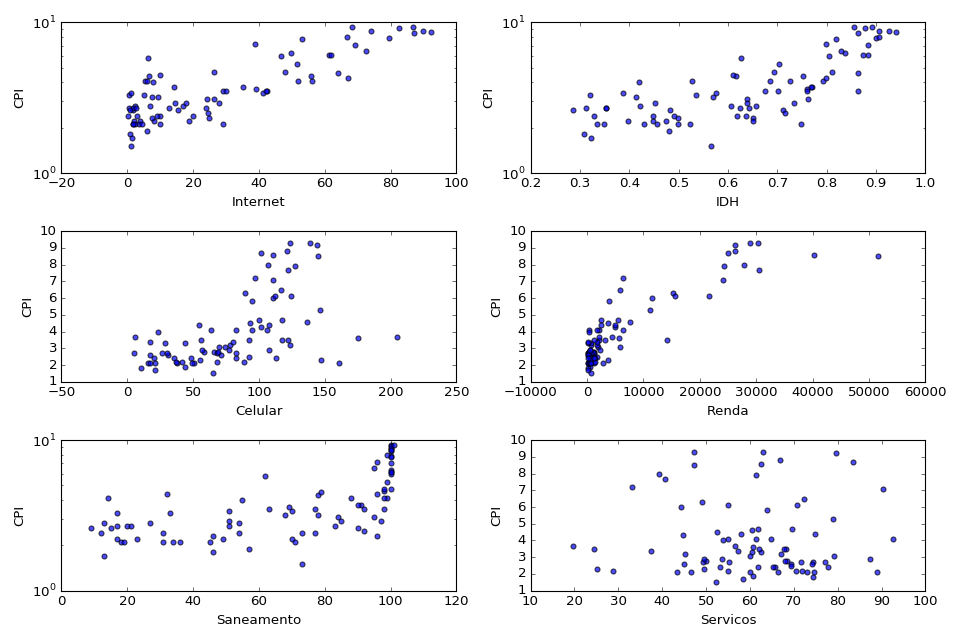

In [7]:
f, ax = plt.subplots(3,2,figsize=(12,8))
ax[0,0].scatter(dados0.Internet, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("Internet")
ax[0,0].set_ylabel("CPI")
ax[0,0].set_yscale('log')

ax[0,1].scatter(dados0.IDH, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("IDH")
ax[0,1].set_ylabel("CPI")
ax[0,1].set_yscale('log')


ax[1,0].scatter(dados0.Celular, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("Celular")
ax[1,0].set_ylabel("CPI")


ax[1,1].scatter(dados0.Renda, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("Renda")
ax[1,1].set_ylabel("CPI")


ax[2,0].scatter(dados0.Saneamento, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[2,0].set_xlabel("Saneamento")
ax[2,0].set_ylabel("CPI")
ax[2,0].set_yscale('log')


ax[2,1].scatter(dados0.Servicos, dados0.CPI, alpha=0.7)  # Plot the raw data
ax[2,1].set_xlabel("Servicos")
ax[2,1].set_ylabel("CPI")


plt.tight_layout(1)

- Analisando os gráficos vemos claramente que as variáveis Serviços, Saneamento e Celular não parecem ter nenhum tipo de correlação clara com a nossa variável resposta. A variável Renda mostra uma certa correlação, mas ela não parece ser linear e sim exponencial. Por fim, as nossas duas escolhas, Acesso a Internet a cada 100 pessoas e IDH são as variáveis que, pela análise dos gráficos demonstram ter a maior correlação de todas as escolhidas.

- Gerando o novo banco de dados, com somente as variáveis escolhidas:

In [8]:
dados = d2.join(d1, how='outer')
dados.head()

,CPI,Internet,IDH
Abkhazia,NaN,NaN,NaN
Afghanistan,1.4,3.246306,0.387
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,3.3,41.200000,0.734
Algeria,2.9,11.230000,0.691


In [9]:
dados=dados[~np.isnan(dados.CPI)]
dados=dados[~np.isnan(dados.Internet)]
dados=dados[~np.isnan(dados.IDH)]

dados.shape

(162, 3)

- Filtrando os erros (NaN). Observamos que, ao retirar as outras variáveis do nosso banco de dados nosso espaço amostral praticamente dobrou. Isso se deve ao fato de que as variáveis excluídas não possuiam informações para grande parte dos países, e quando filtramos os erros no ínicio isso reduziu muito o nosso espaço amostral. Como as bases de Internet e IDH são bem completas, quando construímos o banco de dados somente com essas duas variáveis explicativas ele aumentou consideravelmente. 

- Gerando novos gráficos, agora com todos os países:

<IPython.core.display.Javascript object>


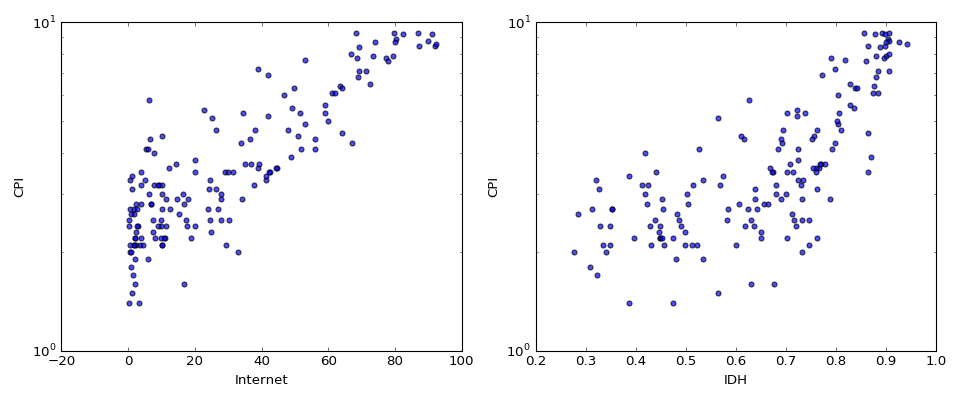

In [10]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.Internet, dados.CPI, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Internet")
ax[0].set_ylabel("CPI")
ax[0].set_yscale('log')

ax[1].scatter(dados.IDH, dados.CPI, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("IDH")
ax[1].set_ylabel("CPI")
ax[1].set_yscale('log')

plt.tight_layout(1)


- Calculando a correlação entre variáveis:

In [11]:
dados.corr(method='pearson')

,CPI,Internet,IDH
CPI,1.000000,0.877293,0.728073
Internet,0.877293,1.000000,0.856976
IDH,0.728073,0.856976,1.000000


- Como podemos ver temos índices bons de correlação entre CPI e Internet e entre CPI e IDH. Os índices mostram que para cada aumento de 1 unidade na variável Acesso à Internet ocorre um aumento de 0.877293 na variável CPI. A tabela também mostra que para cada aumento de 1 unidade no IDH do país ocorre um aumento de 0.728073 na variável CPI. Lembrando que quanto maior é o valor da correlação maior é a associação que podemos estabelecer entre duas variáveis.

- Gerando o gráfico tridimensional que mostra a relação entre as três variáveis:

<IPython.core.display.Javascript object>


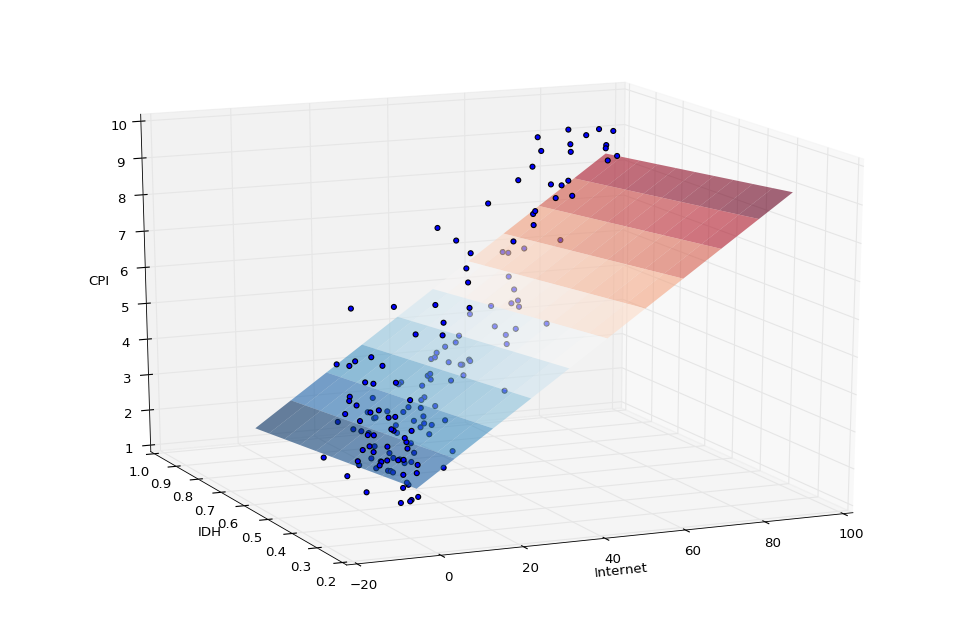

In [12]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Internet', 'IDH']]
y = dados['CPI']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Internet.min(), X.Internet.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Internet, X[resid >= 0].IDH, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Internet, X[resid < 0].IDH, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Internet')
ax.set_ylabel('IDH')
ax.set_zlabel('CPI')

- Gerando a tabela de dados da regressão linear múltipla:

In [13]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.CPI
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     268.8
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           9.80e-52
Time:                        09:13:30   Log-Likelihood:                -231.94
No. Observations:                 162   AIC:                             469.9
Df Residuals:                     159   BIC:                             479.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.5024      0.441      5.676      0.000         1.632     3.373
Internet       0.0755      0.006     12.976      0.000         0.064     0.087
IDH           -1.0665      0.877     -1.216      0.226        -2.798     0.665
==============================================================================
Omnibus:                        5.939   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.508
Skew:                           0.414   Prob(JB):                       0.0637
Kurtosis:                       3.362   Cond. No.                         486.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Como podemos ver, apesar de os valores das correlações quando calculamos para uma regressão linear simples serem bons para ambas as variáveis e do valor do coeficiente de determinação (R-squared) ainda ser alto, quando calculamos os valores para uma regressão linear múltipla temos que a variável Internet tem um impacto positivo na variável CPI, comprovado pelo fato de o valor t observado ser muito alto e o valor P ser 0. Entretando, a variável IDH já não afeta mais positivamente a variável estudada, mostrado pelo coeficiente negativo, e não há evidências de que essa variável tenha relação com a variável explicativa, mostrado pelo valor t observado ser próximo de 0 e o valor P ser bem maior que um alfa de 10%.

In [14]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(3.5810675680208668,
 0.61115813654311135,
 0.70527749686878338,
 0.62029338937127543)

____
## Separando em Grupos

Como mandava o Projeto 3, tínhamos que categorizar os países em subcategorias coerentes afim de testar se modelos locais também estão de acordo com o modelo global. Para criar essas subcategorias escolhemos uma variável que havíamos dispensado no início, a de PIB per capita, e dividimos os países em dois grupos principais, aqueles com PIB per capita menor que 15000 dólares e aqueles com PIB per capita maior que 15000 dólares. 

- Separando e organizando os novos bancos de dados:

In [15]:
subgrupos = d2.join(grupos, how='outer')

In [16]:
subgrupos=subgrupos[~np.isnan(subgrupos.CPI)]
subgrupos=subgrupos[~np.isnan(subgrupos.Internet)]
subgrupos=subgrupos[~np.isnan(subgrupos.IDH)]
subgrupos=subgrupos[~np.isnan(subgrupos.Renda)]

subgrupos.shape
subgrupos.head()

,CPI,Internet,Renda,IDH
Albania,3.3,41.20,1857.352947,0.734
Algeria,2.9,11.23,2192.703976,0.691
Angola,1.9,6.00,619.818580,0.481
Argentina,2.9,34.00,9933.229024,0.788
Armenia,2.6,15.30,1302.456980,0.712


In [17]:
corte = 2200.553962

- Após criarmos os novos bancos de dados queremos testar se as conclusões que tiramos para o grupo com todos os países ainda valem para grupos menores. Portanto, geramos a tabela com os coeficientes da regressão linear múltipla e verificamos se os dados obtidos confirmam ou não a validade do teste para grupos locais.

### Até 15000 dólares

In [18]:
#Até 1500 dólares
grupo1 = pd.DataFrame()
grupo1['CPI']=subgrupos[subgrupos.Renda <= corte].CPI
grupo1['Internet']=subgrupos[subgrupos.Renda <= corte].Internet
grupo1['IDH']=subgrupos[subgrupos.Renda <= corte].IDH
grupo1['PIB']=subgrupos[subgrupos.Renda <= corte].Renda
grupo1.head()

,CPI,Internet,IDH,PIB
Albania,3.3,41.20,0.734,1857.352947
Algeria,2.9,11.23,0.691,2192.703976
Angola,1.9,6.00,0.481,619.818580
Armenia,2.6,15.30,0.712,1302.456980
Bangladesh,2.4,3.10,0.491,532.076998


In [19]:
y=grupo1.CPI
X=grupo1.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     9.077
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           0.000292
Time:                        09:13:30   Log-Likelihood:                -70.600
No. Observations:                  79   AIC:                             147.2
Df Residuals:                      76   BIC:                             154.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.5195      0.310      8.115      0.000         1.901     3.138
Internet       0.0269      0.008      3.328      0.001         0.011     0.043
IDH           -0.2102      0.683     -0.308      0.759        -1.571     1.151
==============================================================================
Omnibus:                       16.186   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.028
Skew:                           1.014   Prob(JB):                     7.38e-05
Kurtosis:                       4.291   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Maiores que 15000 dólares

In [20]:
#Entre 1000 e 4000 dólares
grupo2 = pd.DataFrame()
grupo2['CPI']=subgrupos[subgrupos.Renda > corte].CPI
grupo2['Internet']=subgrupos[subgrupos.Renda > corte].Internet
grupo2['IDH']=subgrupos[subgrupos.Renda > corte].IDH
grupo2['PIB']=subgrupos[subgrupos.Renda > corte].Renda
grupo2.head()

,CPI,Internet,IDH,PIB
Argentina,2.9,34.000000,0.788,9933.229024
Australia,8.7,74.082908,0.926,25007.697756
Austria,7.9,73.488317,0.879,26183.997598
Bahrain,4.9,53.000000,0.805,11600.707375
Barbados,7.8,68.700000,0.790,9243.587053


In [21]:
y=grupo2.CPI
X=grupo2.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     83.66
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           6.25e-20
Time:                        09:13:30   Log-Likelihood:                -127.39
No. Observations:                  79   AIC:                             260.8
Df Residuals:                      76   BIC:                             267.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7973      2.151      0.371      0.712        -3.487     5.082
Internet       0.0707      0.013      5.619      0.000         0.046     0.096
IDH            1.4929      3.384      0.441      0.660        -5.246     8.232
==============================================================================
Omnibus:                        2.207   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.952
Skew:                           0.384   Prob(JB):                        0.377
Kurtosis:                       2.949   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Como podemos ver nas duas tabelas geradas acima, temos algumas semelhanças e outras diferenças claras entre os grupos locais e o grupo global. Primeiramente, as conclusões que tiramos para a variável Acesso à Internet se mantem válidas nos modelos locais. Os coeficientes ainda são positivos e os resultados do valor t e do valor p suportam a hipótese de que essa variável tem relação com a variável resposta CPI. A grande diferença ocorre no caso da variável IDH. Apesar de em ambos os grupos os resultados do valor t e do valor p ainda não suportarem a hipótese de que essa variável tem relação com a variável resposta CPI, no grupo de países com PIB per capita de até 15000 dólares ainda temos um coeficiente negativo, o que vai de acordo com nosso teste global. Entretanto, no grupo de países com PIB per capita maior que 15000 dólares esse coeficiente se torna positivo.

- Gerando o gráfico tridimensional e diferenciando os subgrupos por cor. Vermelho reflete os países com PIB per capita de até 15000 dólares e azul mostra os países de PIB per capita maior que 15000 dólares.

<IPython.core.display.Javascript object>


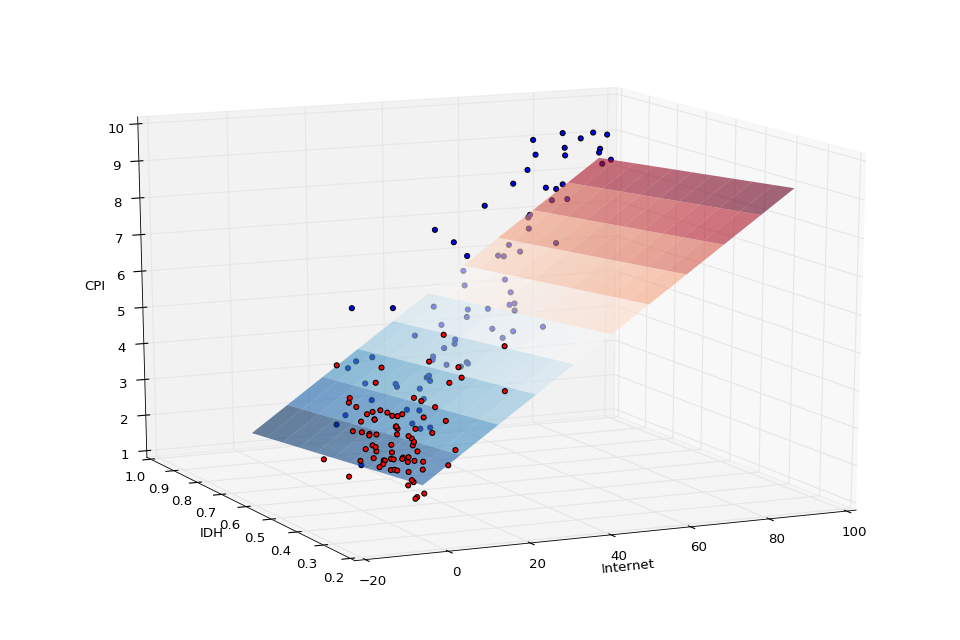

In [22]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Internet', 'IDH']]
y = dados['CPI']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Internet.min(), X.Internet.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

ax.scatter(grupo1.Internet, grupo1.IDH, grupo1.CPI, color='black', alpha=1.0, facecolor='white',c='red')
ax.scatter(grupo2.Internet, grupo2.IDH, grupo2.CPI, color='black', alpha=1.0)
#ax.mouse_init()

ax.set_xlabel('Internet')
ax.set_ylabel('IDH')
ax.set_zlabel('CPI')

## Conclusão:

Primeiramente percebemos nesse projeto que é muito fácil se confundir quando o assunto é regressão linear. Diversas vezes estávamos trabalhando com testes estatísticos feitos para regressões lineares simples e tirando conclusões para modelos de regressão linear múltipla. Um grande exemplo disso foi, apesar de os modelos de regressão linear simples mostrarem que ambas as variáveis explicativas escolhidas tinham relação com a variável resposta, quando colocadas em um modelo de regressão linear múltipla não pudemos afirmar que o IDH realmente afetava o índice de percepção de corrupção. 

Também foi importante entender que, apesar de o nosso modelo ser muito bom para explicar o todo, quando focamos nos subgrupos ou modelos locais percebemos que podemos encontrar diferenças grandes com relação ao global. Pode haver, por exemplo, um grupo de países que, se feito um modelo para eles mostre que o IDH tem sim uma relação com o CPI. Portanto, sem um estudo mais detalhado se torna muito difícil tirar qualquer conclusão precisa sobre como cada variável afeta a variável resposta.

Por fim, aprendemos muito ao longo do projeto sobre essa nova técnica estatística. Todas as etapas, teóricas e práticas ajudaram muito a compreender como utilizar e para que servem as regressões, técnica que será de muita valia para nós daqui em diante. Cada vez mais precisamos entender como sistemas complexos funcionam e como cada variável afeta esse sistema. Apesar de ter sido um projeto simples, usando apenas duas variáveis, hoje nos sentimos aptos a ir afundo e estudar sistemas muito mais complexos, graças aos conhecimentos que adquirimos ao longo desse projeto.